# Problem Description
# The objective of this project is to classify mushrooms as either edible or poisonous based on their features. 
# This problem has real-world significance, as it helps prevent accidental poisonings and ensures public safety.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


Cap Diameter: The measurement of the cap across its widest point. It helps in identifying the mushroom’s size and can range from a few millimeters to several centimeters.

Cap Shape: The overall shape of the cap, such as conical, bell-shaped, flat, or wavy. This characteristic helps in distinguishing different species.

Cap Color: The color of the cap, which can vary widely and may change as the mushroom matures. Color can be a key factor in identifying species.

Does Bruise or Bleed: Refers to whether the mushroom changes color when bruised or if it releases a colored liquid. This reaction can be important for identification.

Gill Color: The color of the gills, which can help in distinguishing species and may change with age.

Stem Height: The length of the stem from the ground to where the cap is attached. Variations in stem height can aid in identification.

Stem Width: The diameter of the stem. It can be narrow, medium, or wide, and varies among species.

Stem Color: The color of the stem, which might be uniform or vary along its length.

Has Ring: Indicates whether the mushroom has a ring (also called an annulus) around the stem, which is a remnant of the partial veil.

Habitat: The environment where the mushroom is found, such as woodlands, grasslands, or urban areas. The habitat can help narrow down the possible species.

Season: The time of year when the mushroom appears. Different species fruit in different seasons, which helps in identification.

In [2]:
!pip install gdown

In [3]:
import gdown
import pandas as pd
import gdown
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dataset Overview
# Loading the dataset and inspecting its structure to understand its features, missing values, and overall quality.


In [4]:
# Replace 'FILE_ID' with the actual file ID from your Google Drive link
file_id = "1xLj540ItAwto14eSA6oIud9ukxb-TiLP"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the dataset
output_path = "dataset.csv"
gdown.download(url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1xLj540ItAwto14eSA6oIud9ukxb-TiLP
From (redirected): https://drive.google.com/uc?id=1xLj540ItAwto14eSA6oIud9ukxb-TiLP&confirm=t&uuid=f6d317b8-21ae-415f-9df0-d6958d1399d7
To: /kaggle/working/dataset.csv
100%|██████████| 168M/168M [00:01<00:00, 106MB/s]  


'dataset.csv'

In [5]:
# Load the dataset
import pandas as pd
df = pd.read_csv(output_path)
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   id class  cap-diameter cap-shape cap-surface cap-color  \
0   0     e          8.80         f           s         u   
1   1     p          4.51         x           h         o   
2   2     e          6.94         f           s         b   
3   3     e          3.88         f           y         g   
4   4     e          5.85         x           l         w   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                    f               a            c          w  ...   
1                    f               a            c          n  ...   
2                    f               x            c          w  ...   
3                    f               s          NaN          g  ...   
4                    f               d          NaN          w  ...   

   stem-root  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0        NaN           NaN          w       NaN        NaN        f         f   
1        NaN   

In [6]:
#Load the dataset
df_train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
print(df_train.shape)


(3116945, 22)


In [7]:
# Check for missing values and basic statistics
print("Missing values:")
print(df_train.isnull().sum())

print("Dataset statistics:")
print(df_train.describe())

Missing values:
id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64
Dataset statistics:
                 id  cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116941e+06  3.116945e+06  3.116945e+06
mean   1.558472e+06  6.309848e+00  6.348333e+00  1.115379e+01
std    8.997847e+05  4.657931e+00  2.699755e+00  8.095477e+00

# Data Cleaning and Preprocessing
# This section focuses on handling missing values, dropping irrelevant columns, encoding categorical features, and scaling numerical features.


In [8]:
# Dropping unnecessary columns
columns_to_drop = ['id','cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 
                   'stem-surface', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color']
df_train = df_train.drop(columns=columns_to_drop)

In [9]:
# Dropping missing values
df_train = df_train.dropna()
print(df_train.shape)

(3116717, 12)


In [10]:
# Removing the duplicates
df_train.duplicated().sum()
df_train = df_train.drop_duplicates(keep='first')

In [11]:
# Setting data types
df_train['cap-diameter'] = df_train['cap-diameter'].astype(float)
df_train['cap-shape'] = df_train['cap-shape'].astype('category')

# Exploratory Data Analysis (EDA)
# We visualize the data to uncover patterns, relationships, and potential outliers.


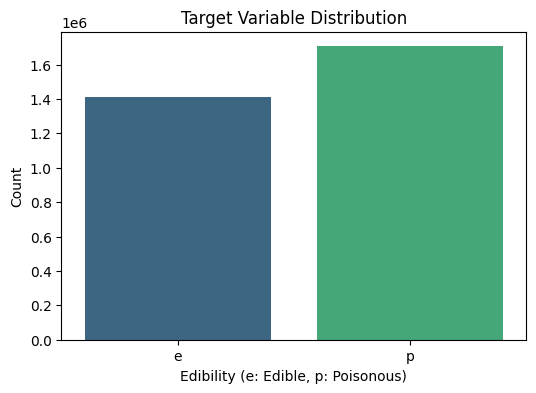

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette="viridis")
plt.title("Target Variable Distribution")
plt.xlabel("Edibility (e: Edible, p: Poisonous)")
plt.ylabel("Count")
plt.show()

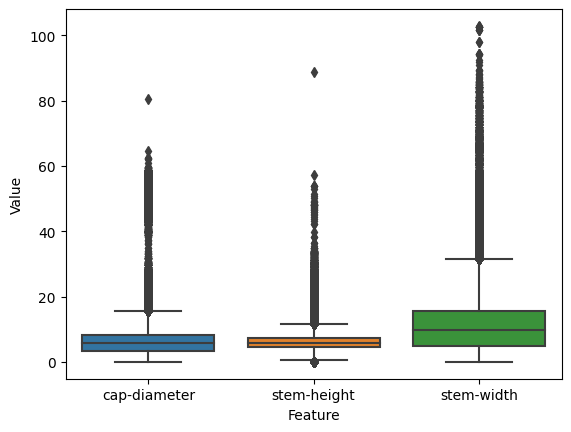

In [13]:
# Visualizing numerical data with boxplots
selected_columns = ['cap-diameter', 'stem-height', 'stem-width']
melted_df = df_train[selected_columns].melt(var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', data=melted_df)
plt.show()

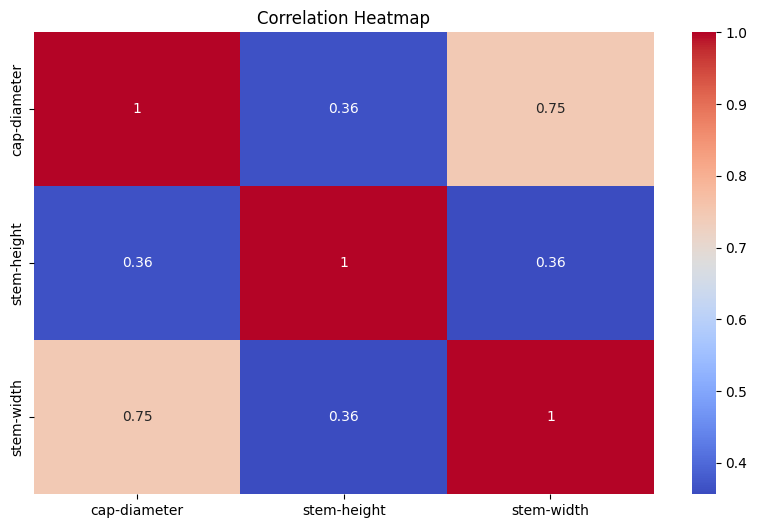

In [14]:
# Filter numerical columns only
numerical_columns = df_train.select_dtypes(include=['number']).columns
correlation_matrix = df_train[numerical_columns].corr()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define only categorical columns to encode
categorical_columns = [
    'cap-shape', 'cap-color', 'does-bruise-or-bleed', 
    'gill-color', 'stem-color', 'has-ring', 
    'habitat', 'season'
]

# Encode categorical columns
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])
 
# Encode the target column
df_train['class'] = label_encoder.fit_transform(df_train['class'])

# Scale numerical columns
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])


# Model Training and Evaluation
# We implement multiple machine learning models and compare their performance based on evaluation metrics such as accuracy and F1-score.


In [16]:
from sklearn.model_selection import train_test_split
# Splitting the dataset

X = df_train.drop(columns=['class'])  # Replace 'class' with the target column name
y = df_train['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Training a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9806
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    281772
           1       0.98      0.98      0.98    341060

    accuracy                           0.98    622832
   macro avg       0.98      0.98      0.98    622832
weighted avg       0.98      0.98      0.98    622832



In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Reduced parameter grid
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [None, 10]   
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=2) 


# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': None, 'n_estimators': 100}


ROC curve

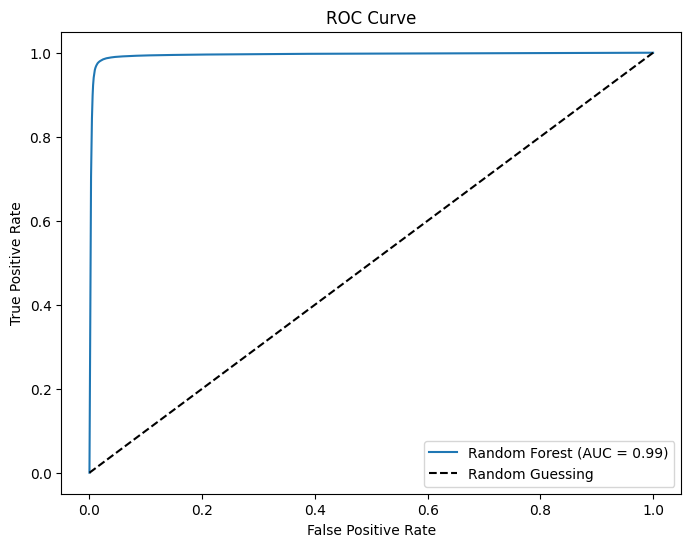

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Confussion matrix

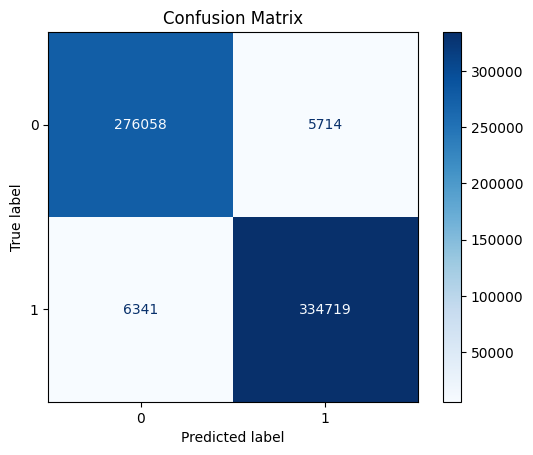

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Loss function

In [25]:
# Log Loss
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_probs)
print(f"Log-Loss: {logloss:.4f}")

Log-Loss: 0.1493


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.6192922007860868


In [61]:
from sklearn.metrics import classification_report


# Example: Generate a classification report for one model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.44      0.51    281772
           1       0.62      0.77      0.69    341060

    accuracy                           0.62    622832
   macro avg       0.62      0.60      0.60    622832
weighted avg       0.62      0.62      0.61    622832



# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' as needed
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))


KNN Accuracy: 0.9783601356385029


In [63]:
from sklearn.metrics import classification_report

# Example: Generate a classification report for one model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98    281772
           1       0.98      0.98      0.98    341060

    accuracy                           0.98    622832
   macro avg       0.98      0.98      0.98    622832
weighted avg       0.98      0.98      0.98    622832



# Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))


Naive Bayes Accuracy: 0.6071524905592519


In [65]:
from sklearn.metrics import classification_report

# Example: Generate a classification report for one model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.46      0.52    281772
           1       0.62      0.73      0.67    341060

    accuracy                           0.61    622832
   macro avg       0.60      0.59      0.59    622832
weighted avg       0.60      0.61      0.60    622832



# Nural Networks

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the integer labels
y_train_onehot = to_categorical(y_train_encoded, num_classes=len(set(y_train)))
y_test_onehot = to_categorical(y_test_encoded, num_classes=len(set(y_test)))

# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.summary()

# Train the model
mlp_model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,922 (38.76 KB)

 Trainable params: 9,922 (38.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - accuracy: 0.8211 - loss: 0.3827 - val_accuracy: 0.9293 - val_loss: 0.2043
Epoch 2/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 123s 2ms/step - accuracy: 0.9398 - loss: 0.1787 - val_accuracy: 0.9468 - val_loss: 0.1628
Epoch 3/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 123s 2ms/step - accuracy: 0.9477 - loss: 0.1604 - val_accuracy: 0.9519 - val_loss: 0.1511
Epoch 4/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 123s 2ms/step - accuracy: 0.9519 - loss: 0.1502 - val_accuracy: 0.9560 - val_loss: 0.1406
Epoch 5/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - accuracy: 0.9543 - loss: 0.1441 - val_accuracy: 0.9589 - val_loss: 0.1328
Epoch 6/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 128s 2ms/step - accuracy: 0.9563 - loss: 0.1394 - val_accuracy: 0.9617 - val_loss: 0.1271
Epoch 7/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - accuracy: 0.9576 - loss: 0.1356 - val_accuracy: 0.9569 - val_loss: 0.1400
Epoch 8/10
77854/77854 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - ac

In [68]:
# Evaluate the model on the test set
loss, accuracy = mlp_model.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.1243
Test Accuracy: 0.9620
